In [1]:
import pandas as pd 
import numpy as np

In [8]:
A=pd.read_csv("/content/Google_Stock_Price_Train.csv")

In [9]:
A.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [10]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [11]:
#Preaparing Data

In [12]:
B=A[["Date","Open"]]
B.head()

,Date,Open
0,1/3/2012,325.25
1,1/4/2012,331.27
2,1/5/2012,329.83
3,1/6/2012,328.34
4,1/9/2012,322.04


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


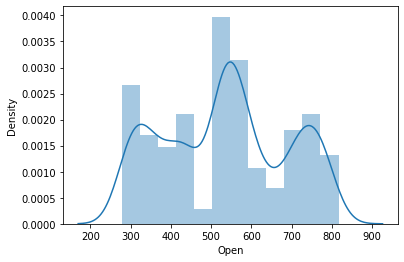

In [13]:
import seaborn as sb
sb.distplot(B.Open)

In [14]:
trd=B[["Open"]].values

In [15]:
trd.shape

(1258, 1)

In [16]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
trd_scaled=ss.fit(trd)

In [19]:
X=[]
Y=[]
for i in range(4,1258,1):
  X.append(trd[i-4:i])
  Y.append(trd[i])

In [20]:
X_arr=np.array(X)
Y_arr=np.array(Y)

In [21]:
#creating the Nueral Network

In [23]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
nn=Sequential()
nn.add(LSTM(units=100, return_sequences=True,input_shape=(4,1)))
nn.add(Dropout(0.2))
nn.add(LSTM(units=100,return_sequences=True))
nn.add(Dropout(0.2))
nn.add(LSTM(units=100,return_sequences=True))
nn.add(Dropout(0.2))
nn.add(LSTM(units=100))
nn.add(Dense(1))
nn.compile(optimizer="adam",loss="mean_squared_error")
nn.fit(X_arr,Y_arr,epochs=400)

Epoch 1/400
40/40 [==============================] - 7s 14ms/step - loss: 299365.1250
Epoch 2/400
40/40 [==============================] - 1s 14ms/step - loss: 289102.9062
Epoch 3/400
40/40 [==============================] - 1s 14ms/step - loss: 284362.6250
Epoch 4/400
40/40 [==============================] - 1s 14ms/step - loss: 279934.2500
Epoch 5/400
40/40 [==============================] - 1s 14ms/step - loss: 275650.1562
Epoch 6/400
40/40 [==============================] - 1s 14ms/step - loss: 271489.0312
Epoch 7/400
40/40 [==============================] - 1s 14ms/step - loss: 267413.5312
Epoch 8/400
40/40 [==============================] - 1s 14ms/step - loss: 263420.0000
Epoch 9/400
40/40 [==============================] - 1s 14ms/step - loss: 259485.3438
Epoch 10/400
40/40 [==============================] - 1s 14ms/step - loss: 255611.7188
Epoch 11/400
40/40 [==============================] - 1s 14ms/step - loss: 251806.1094
Epoch 12/400
40/40 [==============================] 

In [25]:
#Testing Set

In [24]:
C=pd.read_csv("/content/Google_Stock_Price_Test.csv")
C.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [30]:
tsd=C[["Open"]].values
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
tsd_scaled=ss.fit_transform(tsd)

In [31]:
tsd.shape

(20, 1)

In [32]:
Xtest=[]
Ytest=[]
for i in range(4,20,1):
  Xtest.append(tsd_scaled[i-4:i])
  Ytest.append(tsd_scaled[i])

In [33]:
Xt_arr=np.array(Xtest)
Yt_arr=np.array(Ytest)

In [34]:
pred_std=nn.predict(Xt_arr)

In [35]:
pred=ss.inverse_transform(pred_std)

In [36]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Ytest,pred)

8780.235048643735

In [37]:
E=C[4:21]

In [38]:
E["pred"]=pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
E

,Date,Open,High,Low,Close,Volume,pred
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400",8186.997070
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800",8760.411133
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900",9174.757812
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100",9366.327148
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200",9241.375000
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100",9236.572266
10,1/18/2017,805.81,806.21,800.99,806.07,"1,294,400",9256.217773
11,1/19/2017,805.12,809.48,801.80,802.17,"919,300",9218.689453
12,1/20/2017,806.91,806.91,801.69,805.02,"1,670,000",9229.933594
13,1/23/2017,807.25,820.87,803.74,819.31,"1,963,600",9254.922852
